In [ ]:
# Import required libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv')

In [ ]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [ ]:
df.shape

(25079, 18)

In [ ]:
df.Survived_1_year.value_counts()

1    15908
0     9171
Name: Survived_1_year, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  25079 non-null  int64  
 1   Diagnosed_Condition        25079 non-null  int64  
 2   Patient_ID                 25079 non-null  int64  
 3   Treated_with_drugs         25071 non-null  object 
 4   Patient_Age                25079 non-null  int64  
 5   Patient_Body_Mass_Index    25079 non-null  float64
 6   Patient_Smoker             25079 non-null  object 
 7   Patient_Rural_Urban        25079 non-null  object 
 8   Patient_mental_condition   25079 non-null  object 
 9   A                          23723 non-null  float64
 10  B                          23723 non-null  float64
 11  C                          23723 non-null  float64
 12  D                          23723 non-null  float64
 13  E                          23723 non-null  flo

In [ ]:
df.Patient_ID.value_counts()

10558    9
11420    9
11012    9
7707     9
6893     9
        ..
12176    1
10129    1
12192    1
4004     1
11128    1
Name: Patient_ID, Length: 10599, dtype: int64

# EDA & Data Preparation

In [ ]:
def dfaux (df):

	cant = df.isnull().sum()

	df_aux = pd.DataFrame(index = df.columns, data =
	                     {'type': df.dtypes,
	                      'unique_values': df.nunique(),
	                      'have_null?': df.isnull().any(),
	                      'how many?' : cant,
	                      'per' : cant/df.shape[0]*100 })
	return df_aux

In [ ]:
dfaux(df)

,type,unique_values,have_null?,how many?,per
ID_Patient_Care_Situation,int64,23097,False,0,0.000000
Diagnosed_Condition,int64,53,False,0,0.000000
Patient_ID,int64,10599,False,0,0.000000
Treated_with_drugs,object,182,True,8,0.031899
Patient_Age,int64,74,False,0,0.000000
Patient_Body_Mass_Index,float64,10599,False,0,0.000000
Patient_Smoker,object,10,False,0,0.000000
Patient_Rural_Urban,object,2,False,0,0.000000
Patient_mental_condition,object,1,False,0,0.000000
A,float64,2,True,1356,5.406914


In [ ]:
df1 = df.drop_duplicates().drop(['Patient_mental_condition'], 1)
df1.shape

(23097, 17)

In [ ]:
df1['Treated_with_drugs'] = df1['Treated_with_drugs'].str.upper()
df1.Treated_with_drugs = df1.Treated_with_drugs.fillna("DX6")

In [ ]:
for drug in ["DX1", "DX2", "DX3", "DX4", "DX5", "DX6"]:
  df1[drug] = np.where(df1['Treated_with_drugs'].str.contains(drug), 1, 0)

In [ ]:
df1["sum_drug"] = df1["DX1"] + df1["DX2"] + df1["DX3"] + df1["DX4"] + df1["DX5"] + df1["DX6"]

In [ ]:
# don't forget nan's of "Treated_with_drugs"
df1.fillna(0, inplace=True)

In [ ]:
conds = [(df1['Patient_Smoker'] == "NO") | (df1['Patient_Smoker'] == "NO "), 
         (df1['Patient_Smoker'] == "YES") | (df1['Patient_Smoker'] == "YES ") | (df1['Patient_Smoker'] == "YESS") | (df1['Patient_Smoker'] == "YESS "),
         (df1['Patient_Smoker'] == "CANNOT SAY") | (df1['Patient_Smoker'] == "CANNOT SAY ") | (df1['Patient_Smoker'] == "Cannot say ") | (df1['Patient_Smoker'] == "Cannot say")
        ]

choices = ["NO", "YES", "CANNOT SAY"]

In [ ]:
df1['Patient_Smoker'] = np.select(conds, choices, default = 0)
df1.Patient_Smoker.value_counts()

NO            13214
YES            9875
CANNOT SAY        8
Name: Patient_Smoker, dtype: int64

In [ ]:
df1.Patient_Rural_Urban.value_counts()

RURAL    16116
URBAN     6981
Name: Patient_Rural_Urban, dtype: int64

In [ ]:
df1 = pd.get_dummies(df1, columns=['Patient_Rural_Urban'])
df1 = pd.get_dummies(df1, columns=['Patient_Smoker'])

In [ ]:
df1.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6,sum_drug,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_Smoker_CANNOT SAY,Patient_Smoker_NO,Patient_Smoker_YES
0,16201,47,8433,DX2,60,21.655523,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,0,0,0,1,0,1,0,1,0
1,9421,3,2972,DX6,2,28.852743,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,0,1,1,1,0,0,1,0
2,16205,7,8608,DX6,20,26.179725,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1,1,1,0,0,1,0
3,5582,31,10074,DX6,8,22.638945,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,1,1,1,0,0,1,0
4,20880,43,7462,DX1,53,21.326131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0,1,1,0,0,1,0


In [ ]:
df2 = df1.drop(['Treated_with_drugs', 'Patient_Rural_Urban_RURAL', 'Patient_Smoker_CANNOT SAY'], 1)
df2.shape

(23097, 24)

In [ ]:
df2.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6,sum_drug,Patient_Rural_Urban_URBAN,Patient_Smoker_NO,Patient_Smoker_YES
0,16201,47,8433,60,21.655523,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,0,0,0,1,1,1,0
1,9421,3,2972,2,28.852743,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,0,1,1,0,1,0
2,16205,7,8608,20,26.179725,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1,1,0,1,0
3,5582,31,10074,8,22.638945,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,1,1,0,1,0
4,20880,43,7462,53,21.326131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0,1,0,1,0


In [ ]:
dfaux(df2)

,type,unique_values,have_null?,how many?,per
ID_Patient_Care_Situation,int64,23097,False,0,0.0
Diagnosed_Condition,int64,53,False,0,0.0
Patient_ID,int64,10599,False,0,0.0
Patient_Age,int64,74,False,0,0.0
Patient_Body_Mass_Index,float64,10599,False,0,0.0
A,float64,2,False,0,0.0
B,float64,2,False,0,0.0
C,float64,2,False,0,0.0
D,float64,2,False,0,0.0
E,float64,2,False,0,0.0


# Training

In [ ]:
x = df2.drop(['ID_Patient_Care_Situation','Survived_1_year', 'Patient_ID'], axis=1)
print(x.shape)
x.head()

(23097, 21)


,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6,sum_drug,Patient_Rural_Urban_URBAN,Patient_Smoker_NO,Patient_Smoker_YES
0,47,60,21.655523,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,1,0,0,0,0,1,1,1,0
1,3,2,28.852743,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,1,1,0,1,0
2,7,20,26.179725,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,1,1,0,1,0
3,31,8,22.638945,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,1,1,0,1,0
4,43,53,21.326131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1,0,1,0


In [ ]:
y = df2['Survived_1_year'].values
y.shape

(23097,)

In [ ]:
xtr, xte , ytr , yte = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

## Random Forest

In [ ]:
model3 = RandomForestClassifier(max_depth=15, n_estimators = 100, random_state = 42)
model3.fit(xtr,ytr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
yte_pred3 = model3.predict(xte)

In [ ]:
f1_score(yte, yte_pred3)

0.8660446517827391

## LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_train_data = lgb.Dataset(xtr, ytr)
lgb_val_data = lgb.Dataset(xte, yte)

In [ ]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'auc'},
    'num_leaves': 80,
    'min_data_in_leaf': 20,
    'max_depth': 5,
    'verbose': -1,
    'n_jobs': -1,
    'learning_rate': 0.035
}

In [ ]:
evals_result = {}

lgb1 = lgb.train(params, lgb_train_data, 
                 num_boost_round=1000,
                 valid_sets=[lgb_train_data, lgb_val_data],
                 early_stopping_rounds=15, #feval=lgb_acc_score, evals_result=evals_result,
                 verbose_eval=25)

Training until validation scores don't improve for 15 rounds.
[25]	training's auc: 0.880714	valid_1's auc: 0.88202
[50]	training's auc: 0.904715	valid_1's auc: 0.903175
[75]	training's auc: 0.91551	valid_1's auc: 0.912001
[100]	training's auc: 0.923075	valid_1's auc: 0.917365
[125]	training's auc: 0.927858	valid_1's auc: 0.920441
[150]	training's auc: 0.931605	valid_1's auc: 0.922891
[175]	training's auc: 0.934542	valid_1's auc: 0.924655
[200]	training's auc: 0.937161	valid_1's auc: 0.926106
[225]	training's auc: 0.939163	valid_1's auc: 0.926914
[250]	training's auc: 0.940789	valid_1's auc: 0.927474
[275]	training's auc: 0.942134	valid_1's auc: 0.927944
[300]	training's auc: 0.943419	valid_1's auc: 0.928341
[325]	training's auc: 0.944752	valid_1's auc: 0.928473
[350]	training's auc: 0.945886	valid_1's auc: 0.928598
[375]	training's auc: 0.94707	valid_1's auc: 0.928753
[400]	training's auc: 0.948138	valid_1's auc: 0.928748
Early stopping, best iteration is:
[390]	training's auc: 0.94775

In [ ]:
yte_pred_prob4 = lgb1.predict(xte, num_iteration=lgb1.best_iteration)
yte_pred4 = np.where(yte_pred_prob4 > 0.5,1,0)

In [ ]:
f1_score(yte, yte_pred4)

0.8782462057335583

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=44000)

oof = np.zeros(len(x))
y = pd.Series(y)

features = x.columns
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(x.values, y.values)):
    
    print("Fold {}".format(fold_))
    
    trn_data = lgb.Dataset(x.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(x.iloc[val_idx], label=y.iloc[val_idx])

    
    clf = lgb.train(params, trn_data, num_boost_round=2500, valid_sets = [trn_data, val_data], verbose_eval=25, early_stopping_rounds = 50)
    
    oof[val_idx] = clf.predict(x.iloc[val_idx], num_iteration=clf.best_iteration)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance( importance_type="gain")
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    
# print("CV-AUC score: {:<8.5f}".format(roc_auc_score(y, oof)))
yp1 = np.where(oof > 0.5,1,0 )
print("CV-F1: {:<8.5f}".format(f1_score(y,yp1)))

Fold 0
Training until validation scores don't improve for 50 rounds.
[25]	training's auc: 0.882915	valid_1's auc: 0.880029
[50]	training's auc: 0.905311	valid_1's auc: 0.899806
[75]	training's auc: 0.91648	valid_1's auc: 0.909749
[100]	training's auc: 0.92384	valid_1's auc: 0.91487
[125]	training's auc: 0.929334	valid_1's auc: 0.918
[150]	training's auc: 0.933091	valid_1's auc: 0.920015
[175]	training's auc: 0.935625	valid_1's auc: 0.921098
[200]	training's auc: 0.937745	valid_1's auc: 0.922107
[225]	training's auc: 0.939405	valid_1's auc: 0.922682
[250]	training's auc: 0.940822	valid_1's auc: 0.92291
[275]	training's auc: 0.94227	valid_1's auc: 0.923191
[300]	training's auc: 0.943627	valid_1's auc: 0.923144
[325]	training's auc: 0.944806	valid_1's auc: 0.923353
[350]	training's auc: 0.945919	valid_1's auc: 0.923418
[375]	training's auc: 0.946916	valid_1's auc: 0.923574
[400]	training's auc: 0.948133	valid_1's auc: 0.923691
[425]	training's auc: 0.949025	valid_1's auc: 0.923668
[450]	t

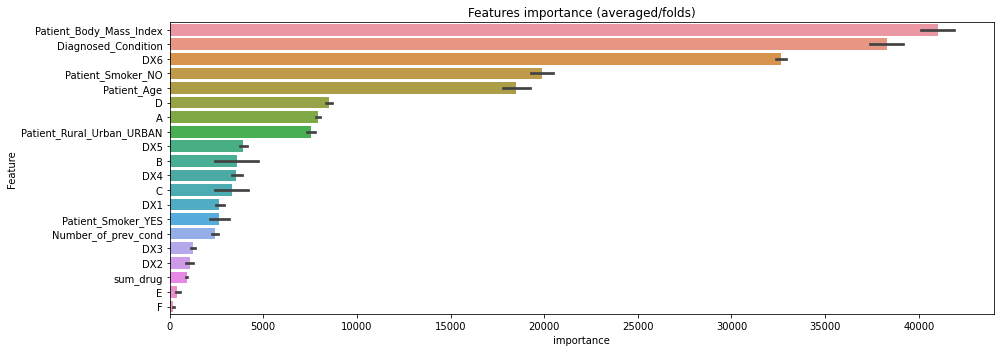

In [ ]:
df_aux = feature_importance_df[["Feature", "importance"]].groupby("Feature").mean().sort_values(by="importance", ascending=False)
df_aux.head()

cols = (df_aux[:20].index)

best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

df_aux2 = df_aux.reset_index()[['Feature']].merge(best_features, on = ['Feature'])

plt.figure(figsize=(14,5))
sns.barplot(x="importance", y="Feature", data = df_aux2)
plt.title('Features importance (averaged/folds)')
plt.tight_layout()

# Submission

In [ ]:
print(x.shape)
x.head()

(23097, 21)


,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6,sum_drug,Patient_Rural_Urban_URBAN,Patient_Smoker_NO,Patient_Smoker_YES
0,47,60,21.655523,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,1,0,0,0,0,1,1,1,0
1,3,2,28.852743,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,1,1,0,1,0
2,7,20,26.179725,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,1,1,0,1,0
3,31,8,22.638945,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,1,1,0,1,0
4,43,53,21.326131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1,0,1,0


In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_advc.csv')
print(df_test.shape)
df_test.head()

(9330, 17)


,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,24206,35,4640,DX5,65,20.710365,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,32827,30,3214,dx1,2,24.250219,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,3694,46,3564,dx6,1,27.139276,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7164,44,5176,DX1,29,29.191759,NO,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,1259,30,1101,DX5,51,20.844146,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Preparation for test

In [ ]:
df_test['Treated_with_drugs'] = df_test['Treated_with_drugs'].str.upper()
df_test.Treated_with_drugs = df_test.Treated_with_drugs.fillna("DX6")

for drug in ["DX1", "DX2", "DX3", "DX4", "DX5", "DX6"]:
  df_test[drug] = np.where(df_test['Treated_with_drugs'].str.contains(drug), 1, 0)

df_test["sum_drug"] = df_test["DX1"] + df_test["DX2"] + df_test["DX3"] + df_test["DX4"] + df_test["DX5"] + df_test["DX6"]

In [ ]:
condst = [(df_test['Patient_Smoker'] == "NO") | (df_test['Patient_Smoker'] == "NO "), 
         (df_test['Patient_Smoker'] == "YES") | (df_test['Patient_Smoker'] == "YES ") | (df_test['Patient_Smoker'] == "YESS") | (df_test['Patient_Smoker'] == "YESS "),
         (df_test['Patient_Smoker'] == "CANNOT SAY") | (df_test['Patient_Smoker'] == "CANNOT SAY ") | (df_test['Patient_Smoker'] == "Cannot say ") | (df_test['Patient_Smoker'] == "Cannot say")
        ]

choicest = ["NO", "YES", "CANNOT SAY"]

df_test['Patient_Smoker'] = np.select(condst, choicest, default = 0)

In [ ]:
df_test = pd.get_dummies(df_test, columns=['Patient_Rural_Urban'])
df_test = pd.get_dummies(df_test, columns=['Patient_Smoker'])

In [ ]:
df_test_2 = df_test.drop(['Patient_mental_condition','Treated_with_drugs', 'Patient_Rural_Urban_RURAL', 'ID_Patient_Care_Situation', 'Patient_ID' ], 1)
df_test_2.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6,sum_drug,Patient_Rural_Urban_URBAN,Patient_Smoker_NO,Patient_Smoker_YES
0,35,65,20.710365,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,1,0,1,0,1,0
1,30,2,24.250219,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1,1,1,0
2,46,1,27.139276,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,1,1,1,0
3,44,29,29.191759,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1,0,1,0
4,30,51,20.844146,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,1,0,1,1,1,0


In [ ]:
df_test_2.shape

(9330, 21)

## Prediction

In [ ]:
from google.colab import files

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=44000)

yt = np.zeros(df_test_2.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds.split(x.values, y.values)):
    
    print("Fold {}".format(fold_))
    
    trn_data = lgb.Dataset(x.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(x.iloc[val_idx], label=y.iloc[val_idx])
    clf = lgb.train(params, trn_data, num_boost_round=2500, valid_sets = [trn_data, val_data], verbose_eval=25, early_stopping_rounds = 50)
    
    yt += clf.predict(df_test_2, num_iteration=clf.best_iteration)

Fold 0
Training until validation scores don't improve for 50 rounds.
[25]	training's auc: 0.882915	valid_1's auc: 0.880029
[50]	training's auc: 0.905311	valid_1's auc: 0.899806
[75]	training's auc: 0.91648	valid_1's auc: 0.909749
[100]	training's auc: 0.92384	valid_1's auc: 0.91487
[125]	training's auc: 0.929334	valid_1's auc: 0.918
[150]	training's auc: 0.933091	valid_1's auc: 0.920015
[175]	training's auc: 0.935625	valid_1's auc: 0.921098
[200]	training's auc: 0.937745	valid_1's auc: 0.922107
[225]	training's auc: 0.939405	valid_1's auc: 0.922682
[250]	training's auc: 0.940822	valid_1's auc: 0.92291
[275]	training's auc: 0.94227	valid_1's auc: 0.923191
[300]	training's auc: 0.943627	valid_1's auc: 0.923144
[325]	training's auc: 0.944806	valid_1's auc: 0.923353
[350]	training's auc: 0.945919	valid_1's auc: 0.923418
[375]	training's auc: 0.946916	valid_1's auc: 0.923574
[400]	training's auc: 0.948133	valid_1's auc: 0.923691
[425]	training's auc: 0.949025	valid_1's auc: 0.923668
[450]	t

In [ ]:
sub1_csv = np.where(yt/5 > 0.5, 1,0)

In [ ]:
res2 = pd.DataFrame(sub1_csv)
res2.to_csv('sub05_3.csv', index=False, header=False)

In [ ]:
# files.download('sub05_3.csv')